In [1]:
%precision %g
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
from math import sqrt, pi, sin, cos, floor, exp
#from cmath import exp
import numpy as np
from numpy import linalg as LA
from numpy.fft import rfft, irfft, rfft2, irfft2
from scipy import constants as C
import matplotlib.pyplot as plt

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png', 'pdf')

# CP 7.1 Fourier transforms of simple functions

This problem examines the Fourier transforms of simple periodic functions. It involves the following functions
- a single cycle of a square wave (amplitude 1)
- a sawtooth wave $y_n = n$
- a modulated sine wave $y_n = \sin{\pi n \over N} \sin{20\pi n\over N}$

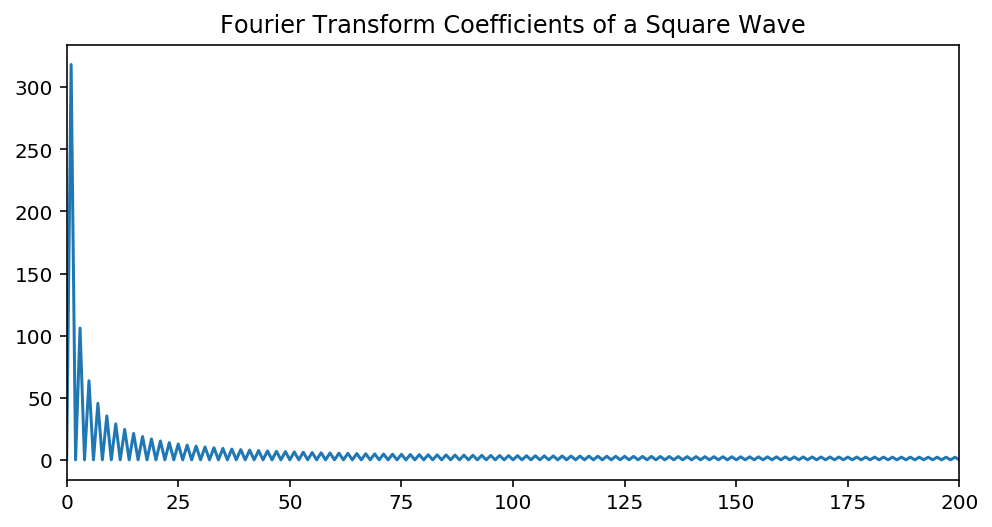

In [3]:
N = 500

#defines square wave
y = np.zeros(N)
y[:int(N/2)] = 1
y[int(N/2):] = -1

c = rfft(y)

fig1, ax1 = plt.subplots(1, 1, figsize = (8, 4))
#increases readability of plot
ax1.set_title("Fourier Transform Coefficients of a Square Wave")
ax1.plot(abs(c))
plt.xlim(0,200)
plt.show()

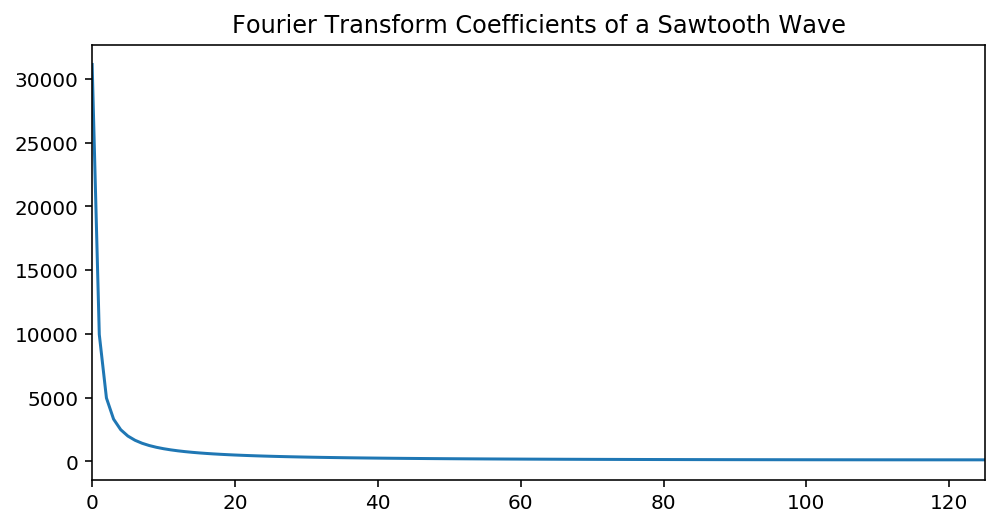

In [4]:
N = 250

#defines sawtooth wave
y = np.zeros(N)
for n in range(len(y)):
    y[n] = n

c = rfft(y)

fig2, ax2 = plt.subplots(1, 1, figsize = (8, 4))
#increases readability of plot
ax2.set_title("Fourier Transform Coefficients of a Sawtooth Wave")
ax2.plot(abs(c))
plt.xlim(0,int(N/2))
plt.show()

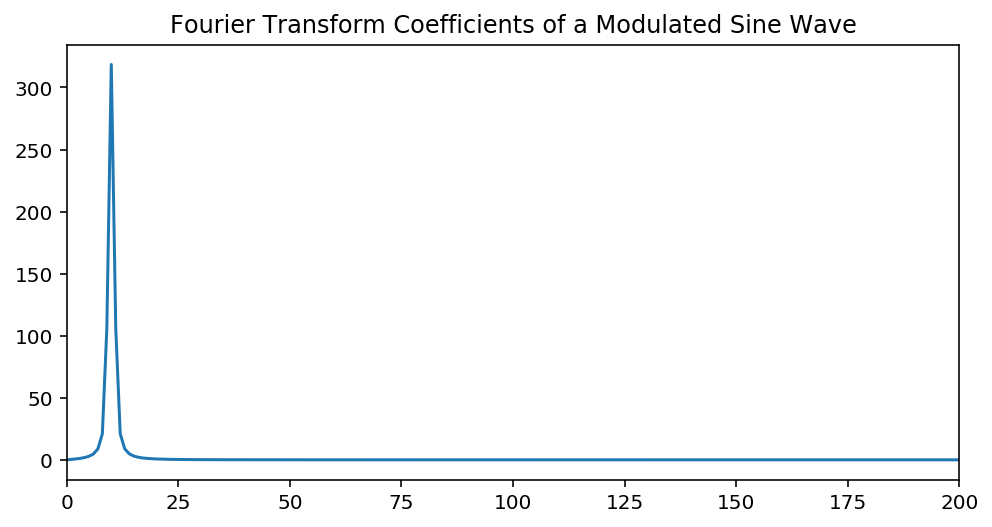

In [5]:
N = 1000

#defines sawtooth wave
x = np.linspace(-1,1,N)
y = np.zeros(N)
for n in range(len(y)):
    p1 = sin(pi*n / N)
    p2 = sin(20*pi*n / N)
    y[n] = p1*p2

c = rfft(y)

fig3, ax3 = plt.subplots(1, 1, figsize = (8, 4))
#increases readability of plot
ax3.set_title("Fourier Transform Coefficients of a Modulated Sine Wave")
ax3.plot(abs(c))
plt.xlim(0,200)
plt.show()

# CP 7.2 Detecting periodicity

Looking at data from January 1749 onwards on the number of monthly sunspots on the sun, we can examine the period of certain fluctuations by applying Fourier transforms to the data. Clearly, it would be difficult to analyze the period based on the graph below alone. It looks as if the distance from peak to peak is roughly 125 months which corresponds to a period of a little under 10.5 years, but this is a fairly imprecise way of doing it.

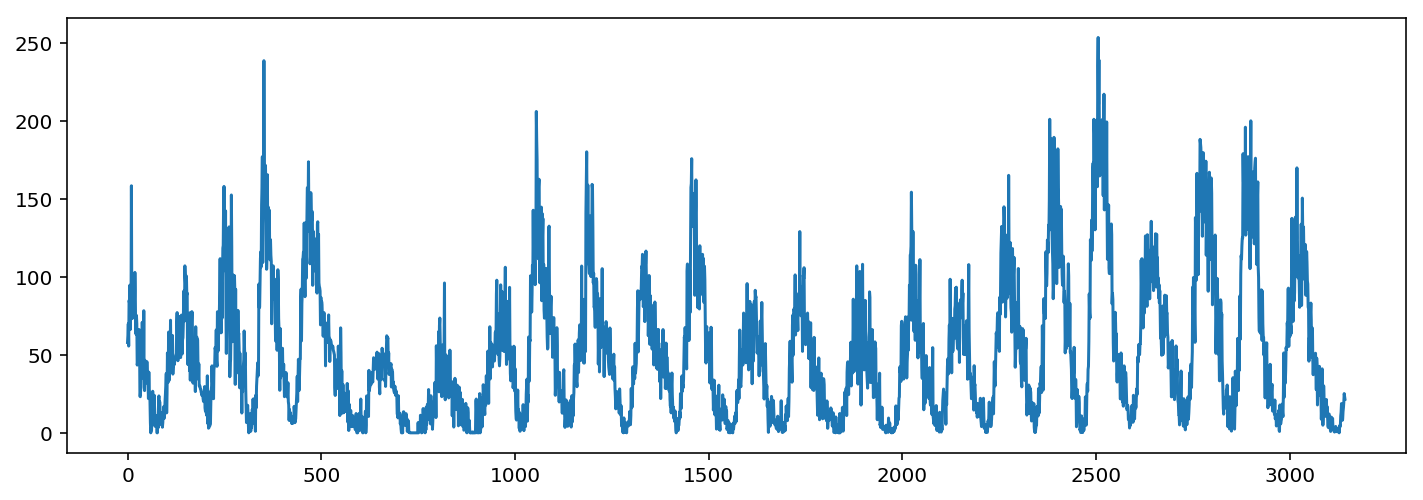

In [6]:
sunspots = np.loadtxt("sunspots.txt", float)

fig4, ax4 = plt.subplots(1, 1, figsize = (12, 4))
x = sunspots[:,0]
y = sunspots[:,1]
#plt.plot(x[:500],y[:500])
ax4.plot(x,y)
plt.show()

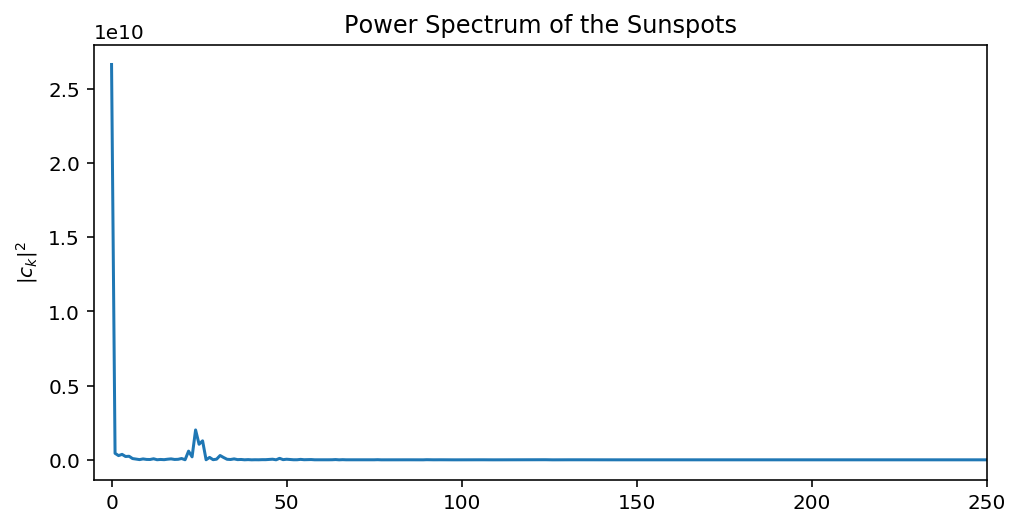

In [7]:
c = rfft(y)
ck2 = abs(c)**2 #magnitude squared for coefficients

fig5, ax5 = plt.subplots(1, 1, figsize = (8, 4))
#increases readability of plot
ax5.set_title("Power Spectrum of the Sunspots")
ax5.plot(ck2)
ax5.set_ylabel("$|c_k|^2$")
plt.xlim(-5,250)
plt.show()

As mentioned in the problem, there is a significant spike in $|c_k|^2 \approx 2 \times 10^9$ for some $k \ne 0.$ While a much smaller spike than the one at $k=0,$ this implies the existence of periodicity in the amount of sunspots. For the coefficients

$$c_k = \sum_{n=0}^{N-1}\ y_n \text{exp}{\bigr(-\text{i}\frac{2\pi k n}{N}\bigr)},$$

the period is determined by the additional factors in the exponent. Without any additional factors, $e^{-\text{i}x}$ has a period of $T= 2\pi.$ The new period $T'$ can be found by multiplying (or dividing) any additional factors that are added to the argument of the exponential. So, for the exponential we have here, $T' = \frac Nk$ where $N$ is the number of data points observed and $k$ is the frequency the specific coefficient is at.

In [8]:
#finding k for secondary peak

#start searching for maximum after initial peak
#then add index where slicing started to find k
k = np.argmax(ck2[15:]) + 15
N = len(y)

T = N / k
T

130.958

Slicing the data around the secondary peak above, it can be found that the spike of $|c_k|^2$ is located at $k=24.$ Combined with the fact that $N = 3143,$ we have $T' = 130.958$ months which corresponds to 10.91 years. This is close to the result found previously by comparing the locations of successive peaks.

# CP 7.3 Fourier transforms of musical instruments

To plot Fourier coefficients from larger datasets, it is necessary to use the fast Fourier transform (FFT) which performs significantly fewer operations to calculate the results. While discrete Fourier transforms are $\mathcal{O}(\tfrac12 N^2),$ FFTs repeatedly splits the given set of points into subgroups to reduce the number of calculations, making it $\mathcal{O}(N \log_2 N).$

For the following data from "trumpets.txt" and "piano.txt," there are enough points to necessitate the use of an FFT.

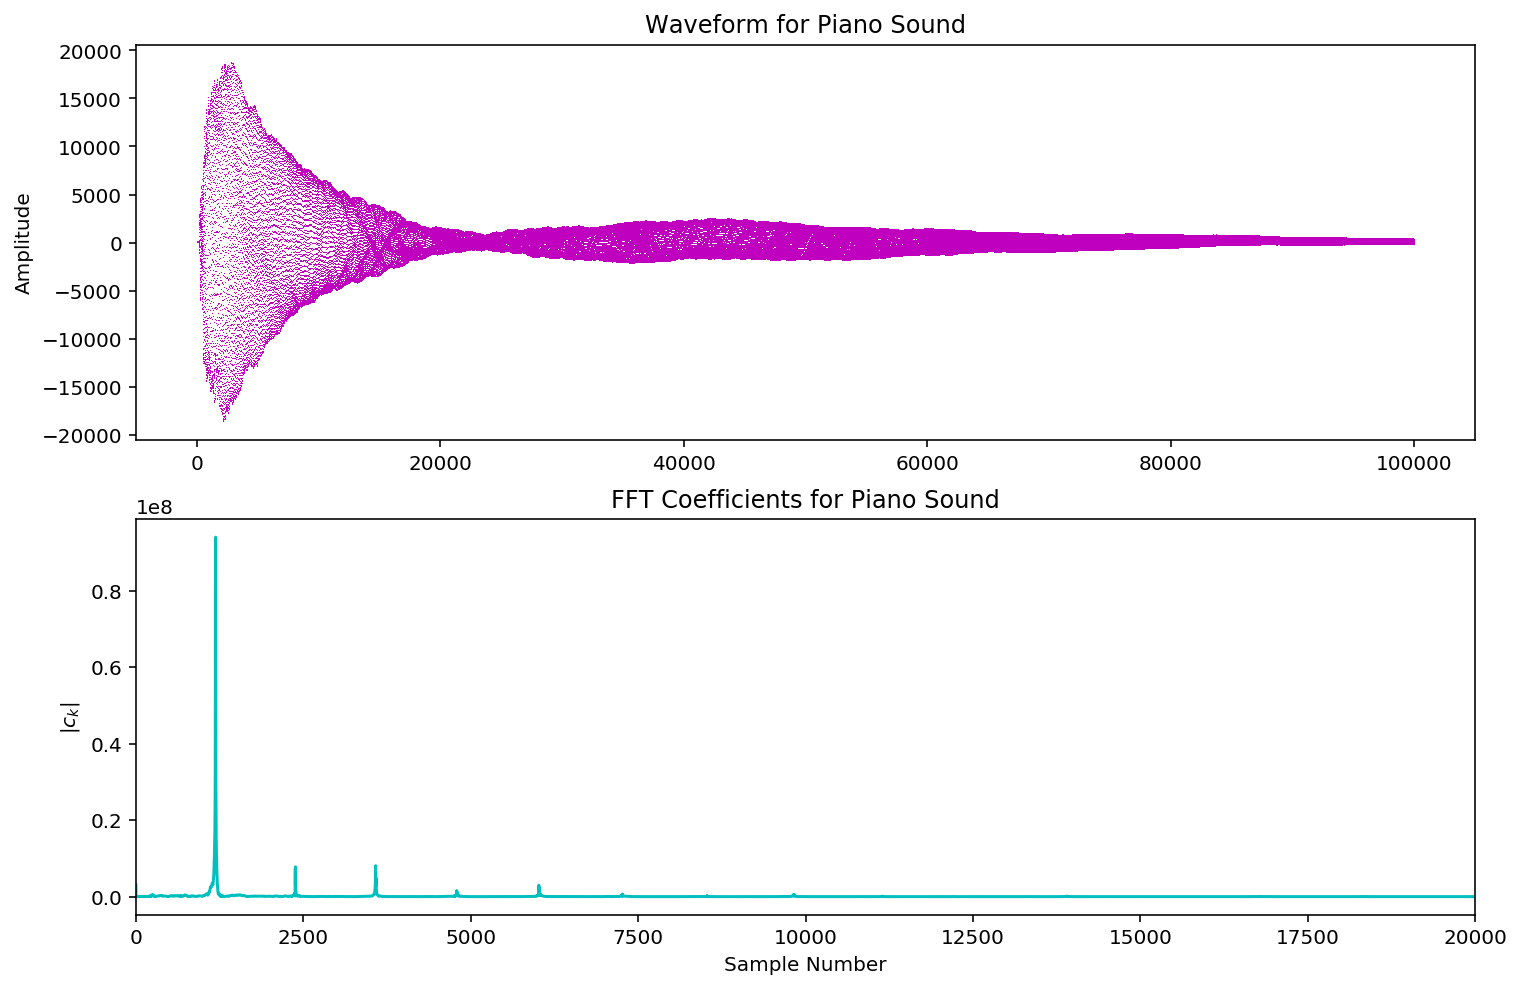

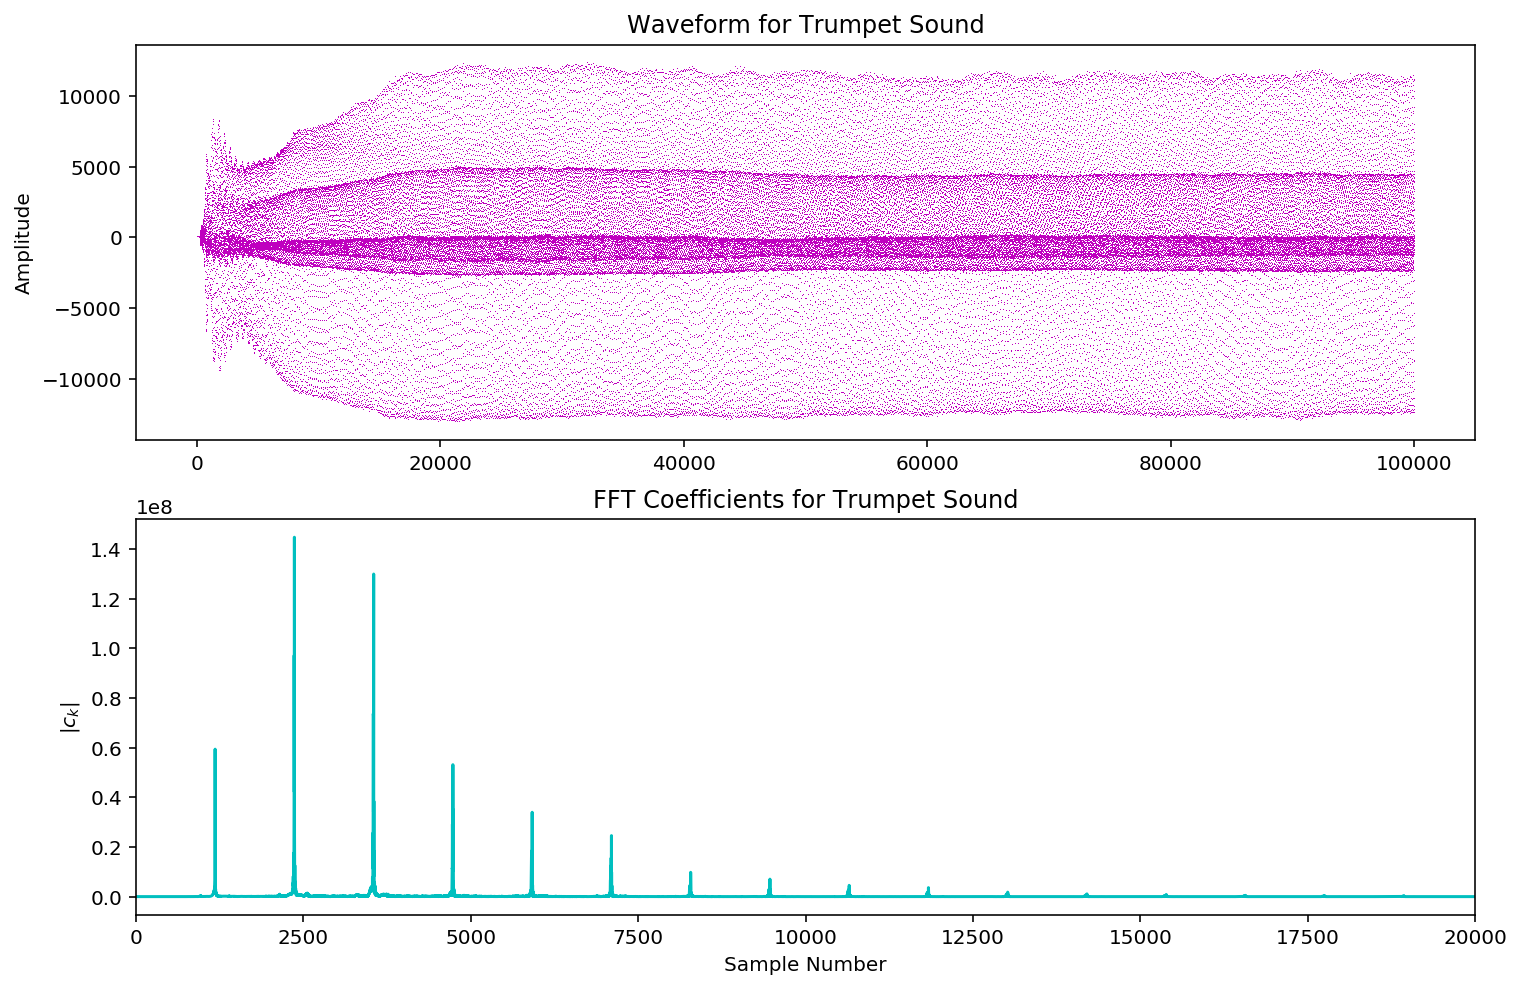

In [9]:
def Ck(filename):
    """Plots the magnitudes of FFT coefficients
        based on data read from the given file"""
    
    #loads file and does rfft
    file = np.loadtxt(filename, float)
    y = file
    c = rfft(y)

    fig, ax = plt.subplots(2, 1, figsize = (12, 8))
    ax[0].plot(y,'m,')
    ax[1].plot(abs(c), 'c')
    
    #creates title for plot
    title = filename[:-4].capitalize()
    ax[0].set_title("Waveform for %s Sound" % title)
    ax[0].set_ylabel("Amplitude")
    ax[1].set_ylabel("$|c_k|$")
    ax[1].set_xlabel("Sample Number")
    ax[1].set_title("FFT Coefficients for %s Sound" % title)
    
    plt.xlim(0,20000)
    plt.show()
    
    return c

#saving coefficients for both
ckp = Ck("piano.txt")
ckt = Ck("trumpet.txt")

Because the magnitude of the FFT coefficients calculated from the piano data is more concentrated at one frequency, its functional form is closer to a pure sine wave than the form of the trumpet's sound. The successive spikes in both the piano and trumpet data represent the harmonics of the peak spike. Because there aren't a lot of random spikes in the plots, we can deduce that there was very little background noise and almost everything seen is purely the instruments' sounds.

Knowing that the sampling rate of these recordings is 44100 allows us to calculate the numerical frequency that $k$ corresponds to for each of the $|c_k|$ coefficients. In turn, knowing that middle C corresponds to the frequency 261 Hz will allow us to calculate the note played by the trumpet and the piano. If we find $k$ for each of the spikes, we can calculate the frequency knowing they are harmonics of each other. Let the locations of the peaks be stored in lists $k_p$ and $k_t$ (for piano and trumpet respectively) where the harmonic frequencies are the entries.

In [10]:
M = 5
#finding k that corresponds to peaks

kp = np.zeros(M+1,float)
#difference between successive harmonics
dkp = np.zeros(M,float)
for i in range(M+1):
    kp[i] = np.argmax(ckp[i*1250:(i+1)*1250]) + i*1250
    
N = 9

kt = np.zeros(N+1,float)
#difference between successive harmonics
dkt = np.zeros(N, float)
for i in range(N+1):
    kt[i] = np.argmax(ckt[i*1300:(i+1)*1300]) + i*1300

print(kp)
print(kt)

#calculations outlined described below
factor = 1e5/44100
for j in range(N+1):
    try:
        k = (kp[j] + kt[j]) / 2
        print("The frequency is {:4.3f} Hz."\
             .format(k/factor))
    except:
        s=0

[ 1191.  2384.  3579.  4814.  6072.  7272.]
[  1181.   2367.   3551.   4731.   5908.   7101.   8286.   9458.  10652.
  11837.]
The frequency is 523.026 Hz.
The frequency is 1047.595 Hz.
The frequency is 1572.165 Hz.
The frequency is 2104.673 Hz.
The frequency is 2641.590 Hz.
The frequency is 3169.247 Hz.


Thus, we can see that the separate spikes, do indeed represent harmonic frequencies because of the highly rigid pattern they appear in. Based on the $k$ we are looking at a specific coefficient for, we can calculate that frequency in Hz based on the number of points sampled and the sampling rate. Because the frequency $k$ we found is related to the number of data points by way of the sampling rate, we know the frequency of the note played (in Hz) is

$$ f = k\ \biggr/ \frac{100000}{44100}.$$

where 100000 is the number of data points we see in the original file. So for our first spike we see a frequency of 523 Hz which is quite close to twice the frequency in the hint of 261 Hz. So 523 Hz corresponds to C one octave above middle C (C5). Similarly, the second frequency we see (1048 Hz) corresponds to C6. The third frequency of 1572 Hz matches that of G6. This makes sense because G is an overtone of C, which means when C is played G is also heard.

# CP 7.4 Fourier filtering and smoothing

This problem examines stock market data for about four years (late 2006 to late 2010) via the Dow Jones Industrial Average.

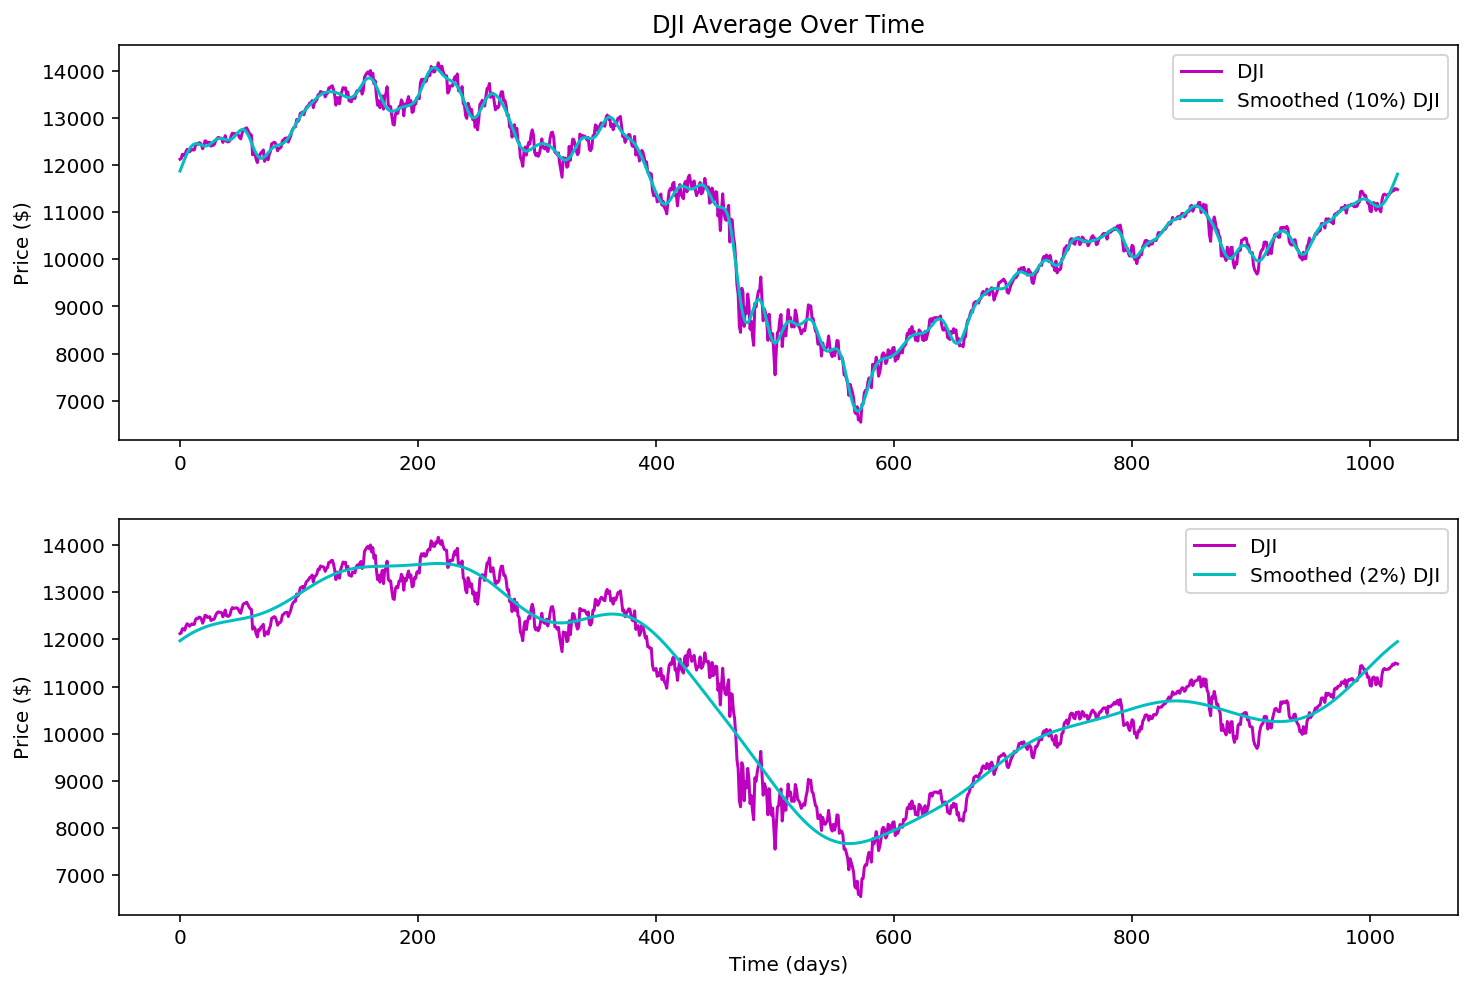

In [11]:
#loading DJI data
y = np.loadtxt("dow.txt", float)
N = len(y)
x = np.arange(N)

#doing FFT on DJI data
c = rfft(y)
M = len(c)

fig6, ax6 = plt.subplots(2, 1, figsize = (12, 8))

#10% smoothed
smooth = 0.1
c[int(smooth*M):] = 0
d = irfft(c)
ax6[0].plot(x, y, 'm', label='DJI')
ax6[0].plot(x, d, 'c', label='Smoothed (10%) DJI')

#2% smoothed
smooth = 0.02
c[int(smooth*M):] = 0
d = irfft(c)
ax6[1].plot(x, y, 'm', label='DJI')
ax6[1].plot(x, d, 'c', label='Smoothed (2%) DJI')

#titles, axes, labels
ax6[0].set_title("DJI Average Over Time")
ax6[0].set_ylabel("Price ($)")
ax6[1].set_ylabel("Price ($)")
ax6[1].set_xlabel("Time (days)")
ax6[0].legend()
ax6[1].legend()
plt.show()

By setting the later values in the FFT coefficient array to 0, we are essentially deleting the higher frequencies that the FFT calculated. So, by taking the inverse after this, we are able to get back the data without any of the higher frequency oscillations (noise) from before. By starting to set coefficients $c_k = 0$ earlier in the array, we begin including only the largest scale oscillations from the original data at lower frequencies, which is why keeping only the first 2% of coefficients results in much greater smoothing than at the 10% level.

# CP 7.5 Artifacts

If we have a square wave of amplitude 1 and frequency 1 Hz defined as

$$f(t) = \begin{cases}
    1  & \quad\mbox{if } \lfloor 2t \rfloor \mbox{ is even,} \\
    -1 & \quad\mbox{if } \lfloor 2t \rfloor \mbox{ is odd,}
    \end{cases}$$

then we can attempt a process similar to in exercise 7.4 to smooth this function.

In [12]:
def f(t):
    """Calculates function as defined above"""
    y = np.zeros(N)
    
    for i in range(len(t)):
        if floor(2*t[i]) % 2 == 0:
            y[i] = 1
        elif floor(2*t[i])%2 == 1:
            y[i] = -1
    return y

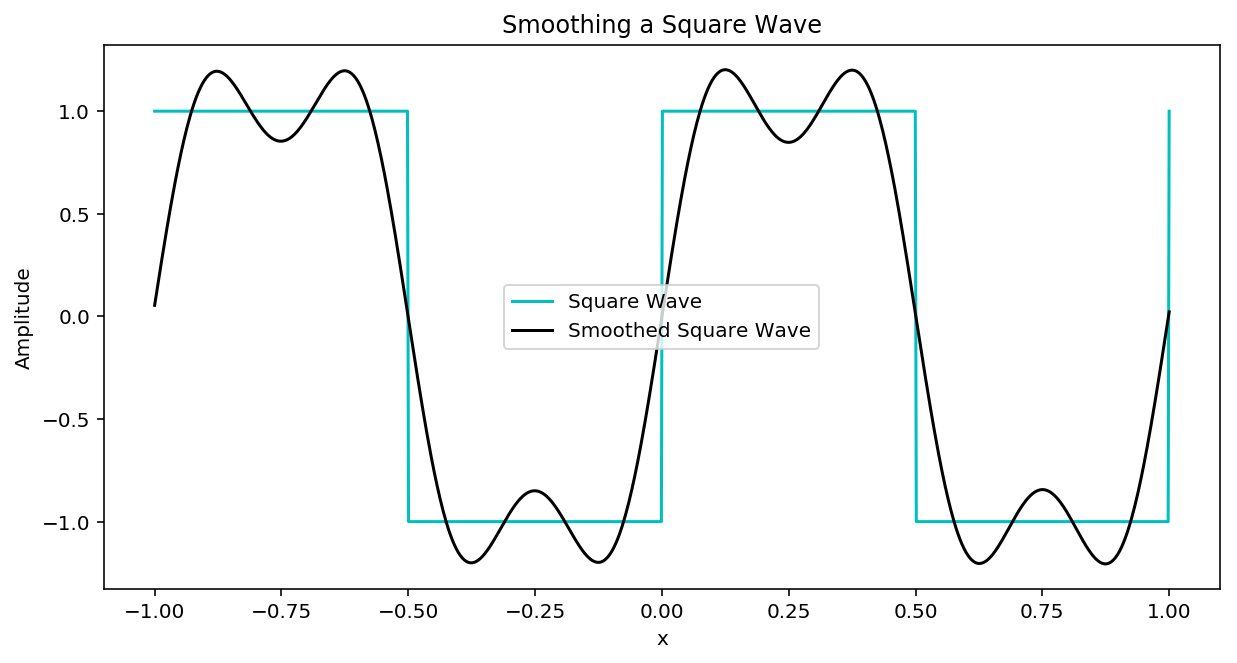

In [13]:
N = 1000
x = np.linspace(-1,1, N)

y = f(x)
c = rfft(y)
M = len(c)

fig7, ax7 = plt.subplots(1, 1, figsize = (10, 5))

c[10:] = 0
d = irfft(c)
ax7.plot(x, y, 'c', label='Square Wave')
ax7.plot(x, d, 'k', label='Smoothed Square Wave')

#titles, axes, labels
ax7.set_title("Smoothing a Square Wave")
ax7.set_ylabel("Amplitude")
ax7.set_xlabel("x")
ax7.legend()
plt.show()

After applying the same smoothing technique as before to the square wave, we can see that it oscillates at the peaks and troughs of the square wave. Because the FFT is based on an oscillating function (sine), it can't take on a constant value like a square wave does. So, the best way for it to approximate the square wave becomes to oscillate as tightly around the square wave extrema so it averages out. If enough of the coefficients are included (at the higher frequencies and thus values of $k$), then these oscillations become almost imperceptible. However, when forced to use only the lowest frequency oscillations, the smoothed curve sweeps out wider arcs when approximating the function. This can be seen just by plotting the same function and smoothing transformation but including the first 50 coefficients instead of just the first 10. And now, the artifacts (wiggles) have reduced in amplitude, but have become more numerous. Overall, this estimates the funtion better.

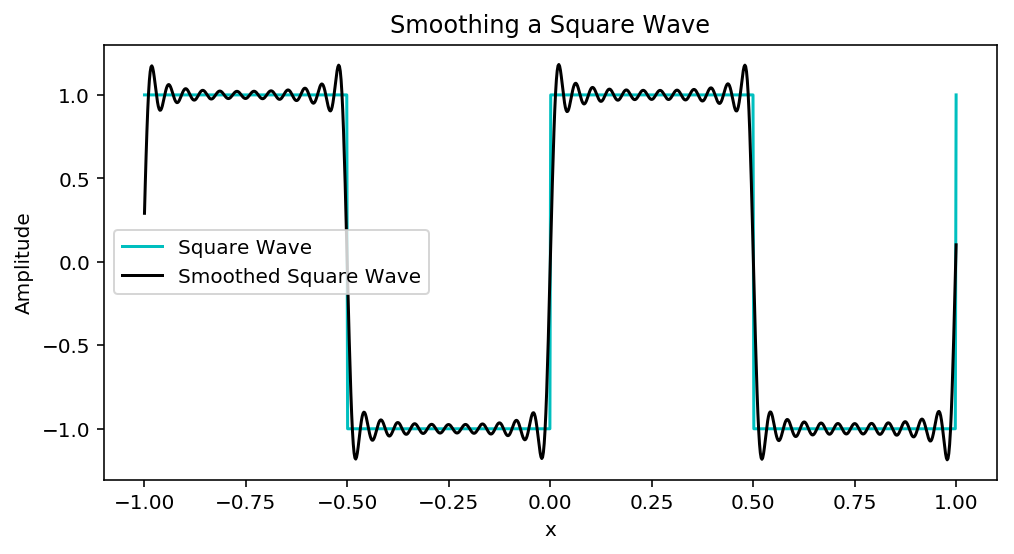

In [14]:
c = rfft(y)
M = len(c)

fig8, ax8 = plt.subplots(1, 1, figsize = (8, 4))

c[50:] = 0
d = irfft(c)
ax8.plot(x, y, 'c', label='Square Wave')
ax8.plot(x, d, 'k', label='Smoothed Square Wave')

#titles, axes, labels
ax8.set_title("Smoothing a Square Wave")
ax8.set_ylabel("Amplitude")
ax8.set_xlabel("x")
ax8.legend()
plt.show()

# CP 7.9 Image deconvolution

Looking at the one-dimensional problem first, the brightness can be represented as

$$b(x) = \int_0^L a(x') f(x-x') \ d x.$$

This can be expanded, Fourier transformed and moved around, so that we have an expression for the Fourier coefficients that is a product of the original blurry data and the point spread function

$$\tilde{b}_k = \int_0^L a(x')
              \exp\biggl( -\text{i} {2\pi k x'\over L} \biggr)
              \tilde{f}_k \ d x'
            = L\,\tilde{a}_k\tilde{f}_{k}.$$

Thus by dividing the Fourier transform of the blurred picture by that of the point spread function, we can find the Fourier coefficients for a de-blurred version of the picture we're attempting to enhance. This can then be inverted to generate the image. In two dimensions, we can recover an analogous relation

$$\tilde{b}_{kl} =  K\tilde{L}{a}_{kl}\tilde{f}_{kl} \implies \frac{\tilde{b}_{kl}}{K\tilde{L}{f}_{kl}} = \tilde{a}_{kl}.$$

The main hurdle we run into is determining the point spread function that we want to use to deblur the image. A good starting point is to assume that it's Gaussian

$$f(x,y) = \text{exp}\biggr(-\frac{x^2 + y^2}{\sigma^2}\biggr),$$

which means we can direct our search to determining the width of the Gaussian function $\sigma.$

In [5]:
"""(a) Loading the blurred image"""
raw_image = np.loadtxt("blur.txt",float)

"""(b) Writing and plotting the point spread function"""
N = len(raw_image) #number of grid points
def point_spread(x,y):
    sigma = 25
    return exp(-(x**2+y**2)/(2*sigma**2))

U = np.zeros((N,N))

for i in range(int(N/2)):
    for j in range(int(N/2)):
        x = point_spread(i,j)    
        U[i,j]   = x
        U[-i,-j] = x
        U[-i,j]  = x
        U[i,-j]  = x

"""(c) Using point spread function to unblur image"""

#fourier coefficients of blurred image
c = rfft2(raw_image)
#fourier coefficients of point spread
psk = rfft2(U)

#coefficients for deblurred image
A = c / (N**2*psk)

tol = 10e-3
for i in range(N):
    for j in range(int(N/2)+1):
        if psk[i,j] < tol:
            A[i,j] = c[i,j] / (N**2)
        
deblurred = irfft2(A)

fig9, ax9 = plt.subplots(2, 1, figsize = (8, 16))
ax9[0].set_xticks([])
ax9[1].set_xticks([])
ax9[0].set_yticks([])
ax9[1].set_yticks([])
ax9[0].imshow(raw_image,cmap='gray')
ax9[1].imshow(deblurred,cmap='gray')
ax9[0].set_title("Blurry Image")
ax9[1].set_title("Deconvoluted Image")

ValueError: operands could not be broadcast together with shapes (572,572,2) (572,287) 

Our ability to deblur a photo comes inherently from the fact that the "blur" and the unblurry image are stored in the same set of numbers. Thus it is impossible to fully separate these two things. Additionally, the process outlined above and then programmed ignores the potential for noise in the file. It assumes the equation

$$b_{kl} =  KL{a}_{kl}f_{kl}$$

is what governs the image where $b_{kl}$ are the FFT coefficients for the original, blurry image. However, the image could have an additional noise term that would make the unveiling of the true image even more difficult. The relation for this scenario could be

$$b_{kl} =  KL{a}_{kl}f_{kl} + n.$$

As far the point spread function is concerned, having zeros or very small values is clearly a problem. Because, if we use these values (for the very small one), it will distort the deconvoluted image from what it should be, however if we ignore these values, we're losing information from the original image since the data can't be separated. So, our deconvolution runs into trouble for both of those workarounds.

Of course, this all assumes that the point spread function in question is accurate and is what is governing the blur. If the function is shifted, weaker, or simply not the blur pattern, this won't work properly. Fortunately, for uses such as satellite imaging and similar scenarios, the light can be treated as originating from point sources and thus this function can be assumed reasonably accurate.